# HW: How to Assess Models 

In this homework, we'll be looking at a dataset of the top 500 movies by production budget -- i.e. the 500 most expensive films ever made, as found on the film data website The Numbers. Original Kaggle dataset can be found here.

## Set-up

In [1]:
# Importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing

Below, we read the dataset into Pandas, then normalize only the numerical columns. Check here for the documentation for sklearn preprocessing's normalize function.

In [2]:
# Read dataset into Pandas
df = pd.read_csv("/work/top-500-movies.csv")

# Drop NaNs
df = df.dropna()

# Normalize only the numerical columns
df_normalized = preprocessing.normalize(df[['worldwide_gross', 'production_cost', 'domestic_gross', 'opening_weekend', 'theaters', 'runtime']])
df_normalized = pd.DataFrame(df_normalized)

df_normalized.columns = ['worldwide_gross', 'production_cost', 'domestic_gross', 'opening_weekend', 'theaters', 'runtime']

# Join normalized columns to original dataset for ease of reference
df = df.join(df_normalized, rsuffix='_normalized')
df

# Drop NaNs again
df = df.dropna()

df.head()

rank release_date                                        title  \
0     1   2019-04-23                            Avengers: Endgame   
1     2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2     3   2015-04-22                      Avengers: Age of Ultron   
3     4   2015-12-16         Star Wars Ep. VII: The Force Awakens   
4     5   2018-04-25                       Avengers: Infinity War   

                                                 url  production_cost  \
0         /movie/Avengers-Endgame-(2019)#tab=summary        400000000   
1  /movie/Pirates-of-the-Caribbean-On-Stranger-Ti...        379000000   
2          /movie/Avengers-Age-of-Ultron#tab=summary        365000000   
3  /movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...        306000000   
4           /movie/Avengers-Infinity-War#tab=summary        300000000   

   domestic_gross  worldwide_gross  opening_weekend   mpaa      genre  \
0       858373000       2797800564      357115007.0  PG-13     Action   
1       241071802       1045713802       90151958.0  PG-13  Adventure   
2       459005868       1395316979      191271109.0  PG-13     Action   
3       936662225       2064615817      247966675.0  PG-13  Adventure   
4       678815482       2048359754      257698183.0  PG-13     Action   

   theaters  runtime    year  worldwide_gross_normalized  \
0    4662.0    181.0  2019.0                    0.940363   
1    4164.0    136.0  2011.0                    0.915954   
2    4276.0    141.0  2015.0                    0.914612   
3    4134.0    136.0  2015.0                    0.897227   
4    4474.0    156.0  2018.0                    0.933683   

   production_cost_normalized  domestic_gross_normalized  \
0                    0.134443                   0.288506   
1                    0.331971                   0.211158   
2                    0.239253                   0.300872   
3                    0.132979                   0.407048   
4                    0.136746                   0.309417   

   opening_weekend_normalized  theaters_normalized  runtime_normalized  
0                    0.120029             0.000002        6.083553e-08  
1                    0.078965             0.000004        1.191242e-07  
2                    0.125376             0.000003        9.242364e-08  
3                    0.107760             0.000002        5.910196e-08  
4                    0.117464             0.000002        7.110788e-08

## Normalization + Splitting into train & test datasets

> Split the dataframe df into training and test sets using train_test_split. If you forgot how, check out the documentation! Fill in the blank below.

In [3]:
# FILL IN THE BLANK
training_data, test_data = train_test_split(df, shuffle=False)
training_data.head()

rank release_date                                        title  \
0     1   2019-04-23                            Avengers: Endgame   
1     2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2     3   2015-04-22                      Avengers: Age of Ultron   
3     4   2015-12-16         Star Wars Ep. VII: The Force Awakens   
4     5   2018-04-25                       Avengers: Infinity War   

                                                 url  production_cost  \
0         /movie/Avengers-Endgame-(2019)#tab=summary        400000000   
1  /movie/Pirates-of-the-Caribbean-On-Stranger-Ti...        379000000   
2          /movie/Avengers-Age-of-Ultron#tab=summary        365000000   
3  /movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...        306000000   
4           /movie/Avengers-Infinity-War#tab=summary        300000000   

   domestic_gross  worldwide_gross  opening_weekend   mpaa      genre  \
0       858373000       2797800564      357115007.0  PG-13     Action   
1       241071802       1045713802       90151958.0  PG-13  Adventure   
2       459005868       1395316979      191271109.0  PG-13     Action   
3       936662225       2064615817      247966675.0  PG-13  Adventure   
4       678815482       2048359754      257698183.0  PG-13     Action   

   theaters  runtime    year  worldwide_gross_normalized  \
0    4662.0    181.0  2019.0                    0.940363   
1    4164.0    136.0  2011.0                    0.915954   
2    4276.0    141.0  2015.0                    0.914612   
3    4134.0    136.0  2015.0                    0.897227   
4    4474.0    156.0  2018.0                    0.933683   

   production_cost_normalized  domestic_gross_normalized  \
0                    0.134443                   0.288506   
1                    0.331971                   0.211158   
2                    0.239253                   0.300872   
3                    0.132979                   0.407048   
4                    0.136746                   0.309417   

   opening_weekend_normalized  theaters_normalized  runtime_normalized  
0                    0.120029             0.000002        6.083553e-08  
1                    0.078965             0.000004        1.191242e-07  
2                    0.125376             0.000003        9.242364e-08  
3                    0.107760             0.000002        5.910196e-08  
4                    0.117464             0.000002        7.110788e-08

## Evaluation of a Regression Model

Here, we're going to train a regression model on the numerical columns of this dataset, to try and predict the Worldwide Gross Earnings of each movie. From there, we'll use evaluation methods for regression models that we learnt in lecture!

Below, we define the predictor and prediction columns in both the train and test datasets. X refers to the predictor dataset, and Y refers to the column we're trying to predict.

In [4]:
# Defining predictor and prediction for training dataset
X_train = training_data[['rank', 'production_cost_normalized', 'domestic_gross_normalized', 'opening_weekend_normalized', 'theaters_normalized', 'runtime_normalized']]
Y_train = training_data['worldwide_gross_normalized']

# Defining predictor and prediction for test dataset
X_test = test_data[['rank', 'production_cost_normalized', 'domestic_gross_normalized', 'opening_weekend_normalized', 'theaters_normalized', 'runtime_normalized']]
Y_test = test_data['worldwide_gross_normalized']
X_train.head()

rank  production_cost_normalized  domestic_gross_normalized  \
0     1                    0.134443                   0.288506   
1     2                    0.331971                   0.211158   
2     3                    0.239253                   0.300872   
3     4                    0.132979                   0.407048   
4     5                    0.136746                   0.309417   

   opening_weekend_normalized  theaters_normalized  runtime_normalized  
0                    0.120029             0.000002        6.083553e-08  
1                    0.078965             0.000004        1.191242e-07  
2                    0.125376             0.000003        9.242364e-08  
3                    0.107760             0.000002        5.910196e-08  
4                    0.117464             0.000002        7.110788e-08

### Training a linear model

In [5]:
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()

# Fit linear model
linear_model.fit(X = X_train, y = Y_train)

LinearRegression()

So we trained a model -- how can we visualize its performance on the test set?

> Predict the Y values based on the train and test predictor sets (called X). Fill in the blanks below.

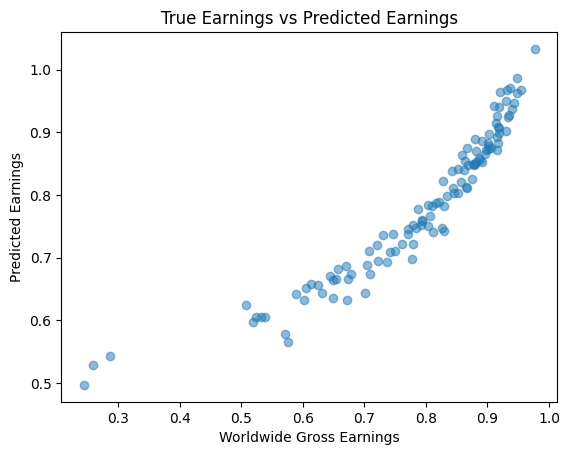

In [6]:
# FILL IN THE BLANKS

# Predict worldwide_gross on the train set
Y_train_pred = linear_model.predict(X_train)

# Predict worldwide_gross on the test set
Y_test_pred = linear_model.predict(X_test)

# Plot predicted vs true earnings
plt.scatter(Y_test, Y_test_pred, alpha=0.5)
plt.xlabel("Worldwide Gross Earnings")
plt.ylabel("Predicted Earnings")
plt.title("True Earnings vs Predicted Earnings");

### Evaluation Metrics

Other than visualizing the performance on the test set, we can quantify it. As we explained in class, there are different kinds of mean error we could be looking at: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared. We'll focus on rMSE here.

Here's a function that calculates the rMSE for you:

In [7]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the predictions from the model
        actual_y: an array of the groundtruth label
        
    Returns:
        The root mean square error between the prediction and the groundtruth
    """
    sum_sq = sum((actual_y - predicted_y) ** 2)
    return np.sqrt(np.mean(sum_sq))

> Now use the function above to calculate the rMSE for the train and test sets. Fill in the blanks below. Use:

- Y_train and Y_train_pred

- Y_test and Y_test_pred

In [8]:
# FILL IN THE BLANKS
train_error = rmse(Y_train, Y_train_pred)
test_error = rmse(Y_test, Y_test_pred)

print("Training RMSE:", train_error)
print("Test RMSE:", test_error)

Training RMSE: 0.7003461347793021
Test RMSE: 0.5953089591750541


Looks like our model did better on the test set than the train set! That's great.

## Evaluation of a Classification Model

Moving onto the application of error evaluation to a classification model. Here, we're going to train a classification model on this dataset, to try and predict the genre of each movie. 

It looks like 42% of the movies in this dataset are Action movies. Maybe you just watched Top Gun Maverick, and you're looking for another movie in the action genre. Let's see whether we can predict whether a movie is in the action genre using this dataset.

We'll conduct logistic regression, which is a statistical model that models the probability of an event taking place. Here, the event would be if the movie in question is in the action genre.

### Training a logistic regression model

> What genre are we predicting? Fill in the blanks below.

In [9]:
# FILL IN THE BLANKS

# Defining predictor and prediction for training dataset
X_train2 = training_data[['rank', 'worldwide_gross_normalized', 'production_cost_normalized', 'domestic_gross_normalized', 'opening_weekend_normalized', 'theaters_normalized', 'runtime_normalized']]
Y_train2 = training_data['genre'] == 'Action'

# Defining predictor and prediction for test dataset
X_test2 = test_data[['rank', 'worldwide_gross_normalized', 'production_cost_normalized', 'domestic_gross_normalized', 'opening_weekend_normalized', 'theaters_normalized', 'runtime_normalized']]
Y_test2 = test_data['genre'] == 'Action'
X_train2.head()

rank  worldwide_gross_normalized  production_cost_normalized  \
0     1                    0.940363                    0.134443   
1     2                    0.915954                    0.331971   
2     3                    0.914612                    0.239253   
3     4                    0.897227                    0.132979   
4     5                    0.933683                    0.136746   

   domestic_gross_normalized  opening_weekend_normalized  theaters_normalized  \
0                   0.288506                    0.120029             0.000002   
1                   0.211158                    0.078965             0.000004   
2                   0.300872                    0.125376             0.000003   
3                   0.407048                    0.107760             0.000002   
4                   0.309417                    0.117464             0.000002   

   runtime_normalized  
0        6.083553e-08  
1        1.191242e-07  
2        9.242364e-08  
3        5.910196e-08  
4        7.110788e-08

In [10]:
# Training the logistic regression model
lr = sklearn.linear_model.LogisticRegression(fit_intercept=True, solver = 'lbfgs')
lr.fit(X_train2,Y_train2) 

lr.predict(X_test2)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

We've gotten an array of predictions: True for action movies; False for non-action movies. 

### Evaluation Metrics

Accuracy is defined as the number of correct predictions / the number of total predictions.

> Check if the predictions of the X train/test sets are the same as the original Y values

In [11]:
# FILL IN THE BLANKS
train_accuracy = np.sum(lr.predict(X_train2) == Y_train2) / len(X_train2)
test_accuracy = np.sum(lr.predict(X_test2) == Y_test2) / len(X_test2)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.5608
Test accuracy: 0.6460


But accuracy isn't everything. Let's look at a confusion matrix instead. Here's the documentation for the sklearn.metrics function.

Confusion matrix, without normalization
[[73  0]
 [40  0]]


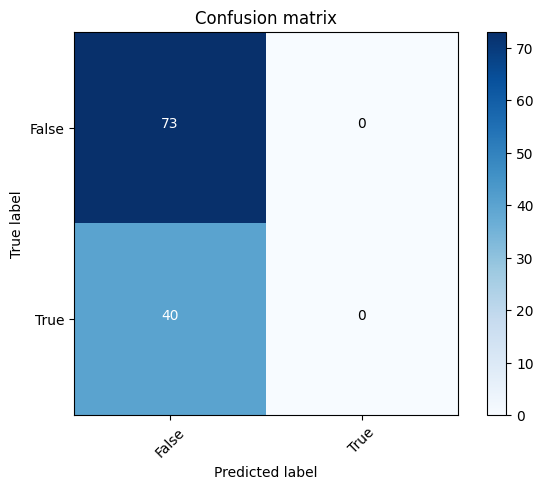

In [12]:
cm = sklearn.metrics.confusion_matrix(Y_test2, lr.predict(X_test2))

# Define a function to plot a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['False', 'True']

# Plot confusion matrix
plt.figure()
plt.grid(False)
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix')

> From the confusion matrix above, what is the number of false negatives?

Your answer: 73

Looks like both our accuracy and the confusion matrix indicate that our model is pretty bad at predicting whether a movie is in the action genre. The confusion matrix, however, indicates that most of that low accuracy is driven by labels that are wrongly predicted as 'False' when they are actually 'True' -- movies that are actually action movies but are not predicted as such.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7e16ca41-a912-4a7c-a9ea-992d9e56c68f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>